# PRESENTATION PLAN

### 1. INTRODUCTION

This dataset contains house sale prices for King County, which includes Seattle. It includes houses sold between May 2014 and May 2015. There are 21613 observations with 19 features, price and id columns.

### 2. ANALYZE PREPARATION

We are going to make some changes and clean the data.

### 3. DATA EXPLARATORY

We are going to dive into data set to understand relations among features add new features to the data set.

>####	3.1. OUTLIERS
>####	3.2. DATA CLEANING AND TRANSFORMATION
>####	3.3. DISTRIBUTIONS
>####	3.4. MAPPING HOUSES
>####	3.5. CORRELATIONS

### 4. MODELING

We are going to set some models and test them whether they are good or bad.

>####	4.1. MODELS
>####	4.2. TRAINING AND PREDICTING
>####	4.3. RESULTS
>####	4.4. VISUALIZATION OF RESULTS
    
### 5. MODEL VERIFICATION

We have Gauss-Markov Assumptions (Conditions) to check problems if any. When the model passes the tests, we can trust our model.

>####	5.1. LINEARITY
>####	5.2. RANDOM
>####	5.3. NON-COLLINEARITY
>####	5.4. EXOGENEITY
>####	5.5. HOMOSCEDASTICITY
    
### 6. CONCLUSION

#### ---------------------------------------------------------------------

### 1. INTRODUCTION

- Definitions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sts
import statsmodels.api as sm
import math
import warnings

from matplotlib.mlab import PCA as mlabPCA
from statsmodels.tools.eval_measures import mse, rmse
from statsmodels.tsa.stattools import acf

from sklearn import linear_model
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import normalize, scale, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error

from scipy.stats.mstats import winsorize
from scipy.stats import zscore, jarque_bera, normaltest, bartlett, levene
from sqlalchemy import create_engine

warnings.filterwarnings('ignore')

import folium

### 2. ANALYZE PREPARATION

- Let's load the dataset.

In [2]:
hs=pd.read_csv("kc_house_data.csv")

- Having a glance on the data.

In [3]:
hs.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


- As we see, there are no null values in our dataset. All observations are full.

In [4]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.4+ MB


In [5]:
hs.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


- We should make some changes in order to make easy to understand the data; e.g. parsing the date and converting units.

In [6]:
house=hs
house["year_sold"]=np.int64([i[0:4] for i in hs["date"]])
house["month_sold"]=np.int64([i[4:6] for i in hs["date"]])
house["day_sold"]=np.int64([i[6:8] for i in hs["date"]])

sq_conv=10.7639
sqft=["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15"]
sqmt=["sqmt"+i[4:] for i in sqft]
for i in range(0, len(sqft)):
    house[sqmt[i]]=[j/sq_conv for j in hs[sqft[i]]]

In [7]:
house.drop(sqft, axis=1, inplace=True)
house.drop("date", axis=1, inplace=True)

### 3. DATA EXPLATORY

#### 3.1. OUTLIERS

- We should check presence of outliers and decide what to do with them. We can use boxplot for this.

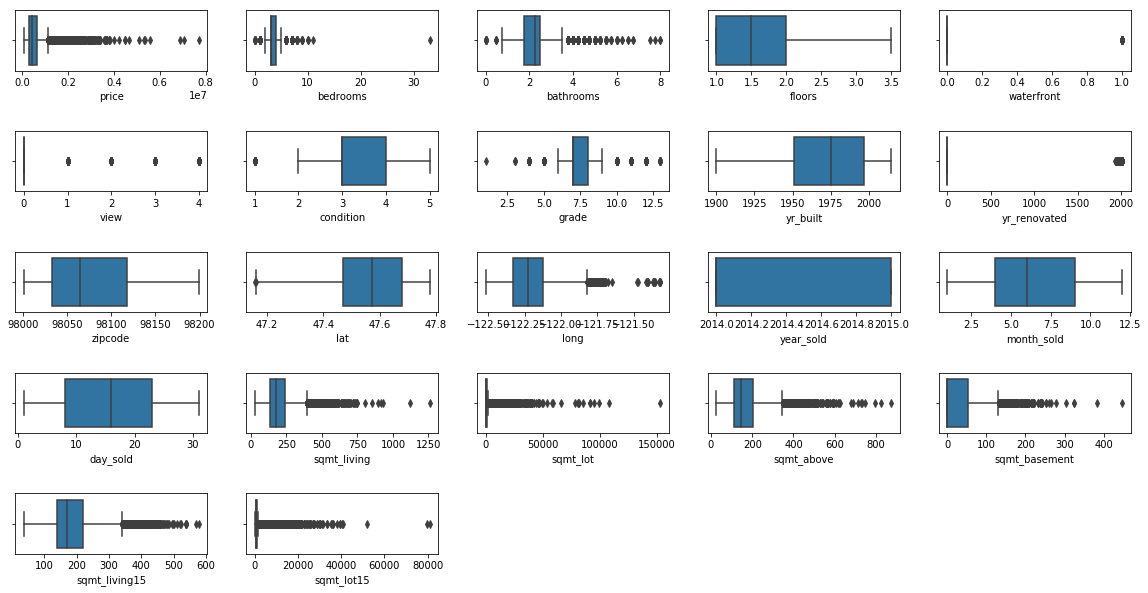

In [8]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=1, wspace=0.2)
for i in range(1,len(house.columns)):
    plt.subplot(5,5,i)
    sns.boxplot(house.iloc[:,i])
plt.show()

- Thoughts:
> 1. Outliers of price can't be understood from boxplot, because there are some very big houses in area size. Winsorizing may cause faults,
 2. There is only one outlier for 'bedroom' parameter,
 3. 'bedroom' and 'bathroom' has 0 (zero) values which are not to be considered valid,
 4. 'bathroom' and 'floors' parameters' data type is float64 including halves and quarters,
 5. 'yr_renovated' parameter has 0 (zero) values for not being renovated,
 6. Parameters relating to area sizes and price are spread in a wide range. 

- What to do:
> 1. For price parameter's outliers, we may choose to soften,
 2. 'bedrooms' outlier and zero bedroom/bathroom values should be cleaned,
 3. 'bathrooms' parameter type must be converted to integer with rounding lower. But, garret can be thought as a half floor.
 4. If house is not renovated, renovation year must be built year,
 5. If we think that some observations can be wrong, those must be cleaned. But, I don't think so. All observations are possible. So, they can be converted to a less effective form such as calculating logaritm or square root.

#### 3.2. DATA CLEANING AND TRANSFORMATION

In [9]:
house=house.drop(house[house["bedrooms"]>15].index, axis=0)
house=house.drop(house[house["bedrooms"]==0].index, axis=0)
house=house.drop(house[house["bathrooms"]==0].index, axis=0)
house=house.reset_index(drop=True)

house["bathrooms"]=[math.trunc(i) for i in house["bathrooms"]]
house["yr_renovated"]=house["yr_renovated"].replace(0, house["yr_built"])

- We can create a new parameter: age of the building at trade date. Some houses were brand new and some hadn't been finished then.

In [10]:
house["age_sold"]=house["year_sold"]-house["yr_built"]

- Let's make some parameters distributing in a wide range less effective.

In [11]:
prmt_to_soften=["sqmt_living", "sqmt_lot", "sqmt_above", "sqmt_basement", "sqmt_living15", "sqmt_lot15"]
for i in prmt_to_soften:
    house[i]+=1
    house[i+"_log"]=np.log(house[i])

#### 3.3. DISTRIBUTIONS

- Here is distributions of parameters.

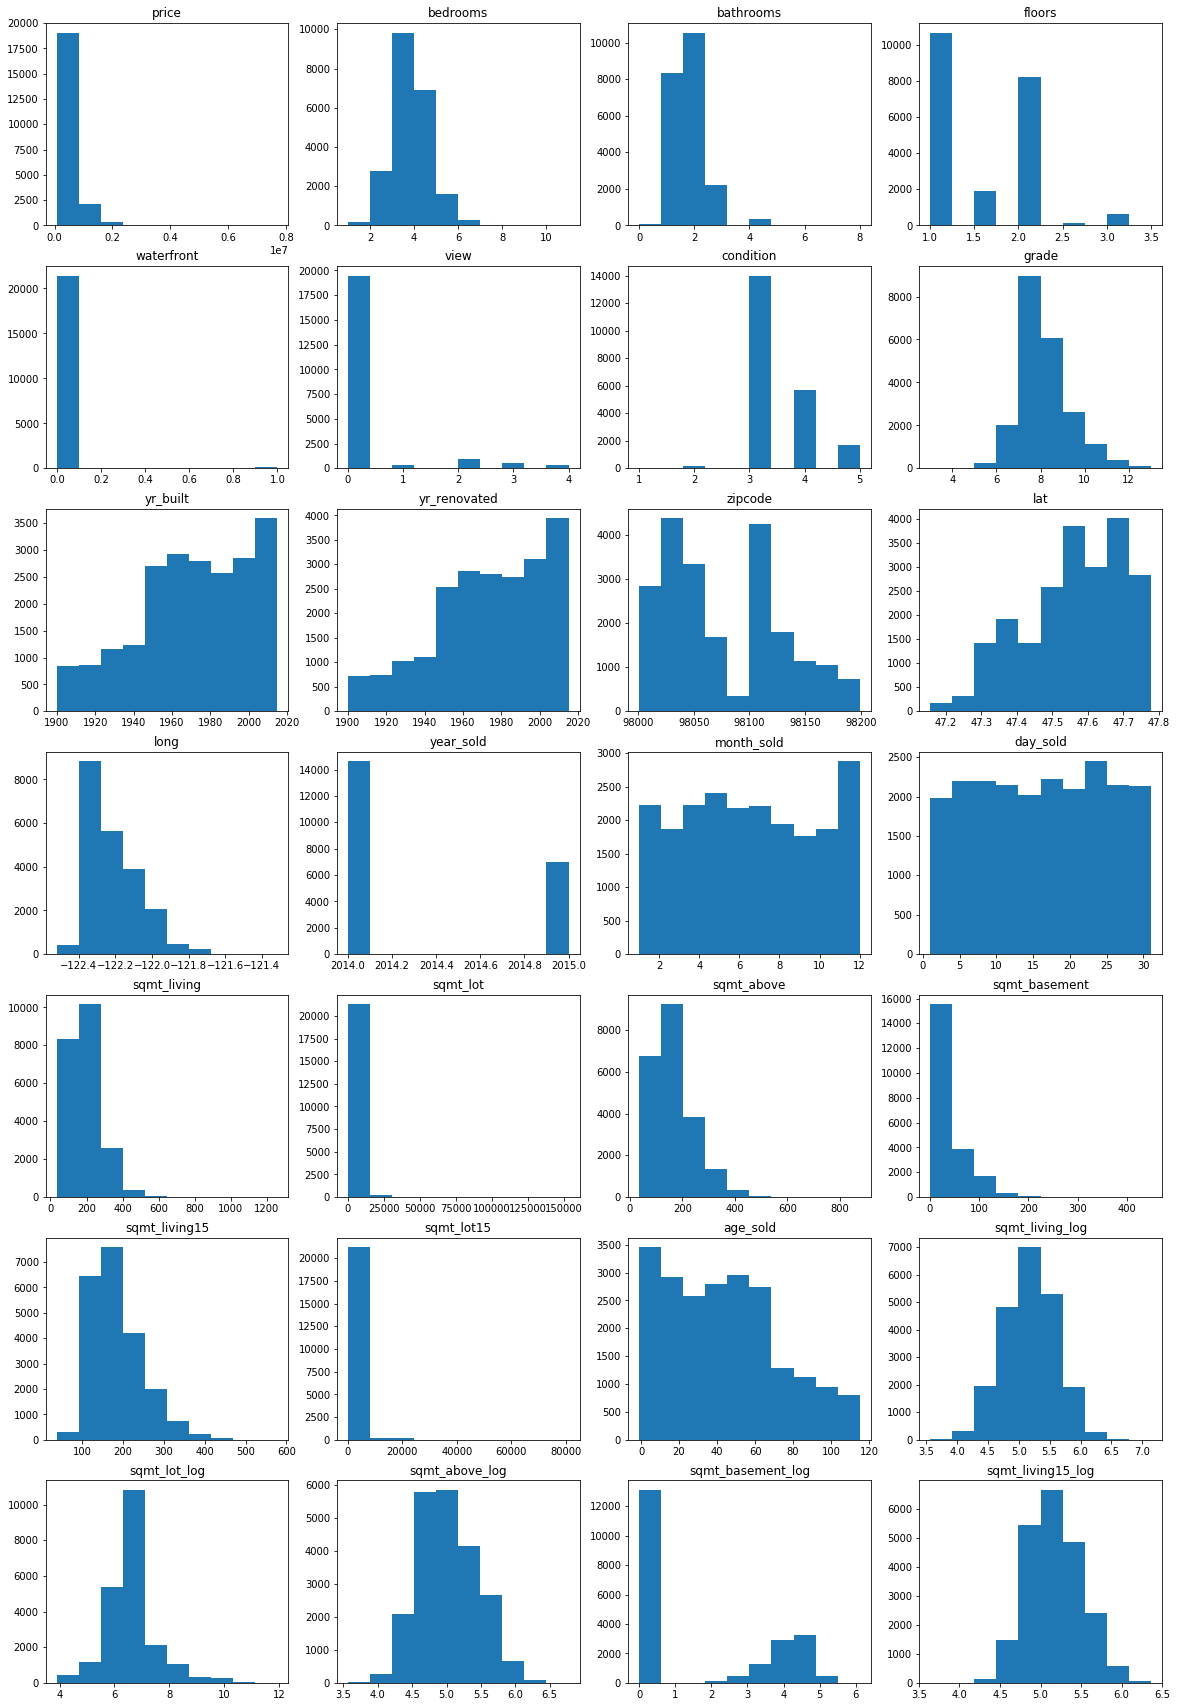

In [12]:
plt.figure(figsize=(20, 35))
plt.tight_layout()

for i in range(1, len(house.columns)-1):
    plt.subplot(8,4,i)
    plt.hist(house[house.columns[i]])
    plt.title(house.columns[i])
    
plt.show()

- Now, we can examine all parameters' relationship with price. Also, we may compare results with logaritmic prices.

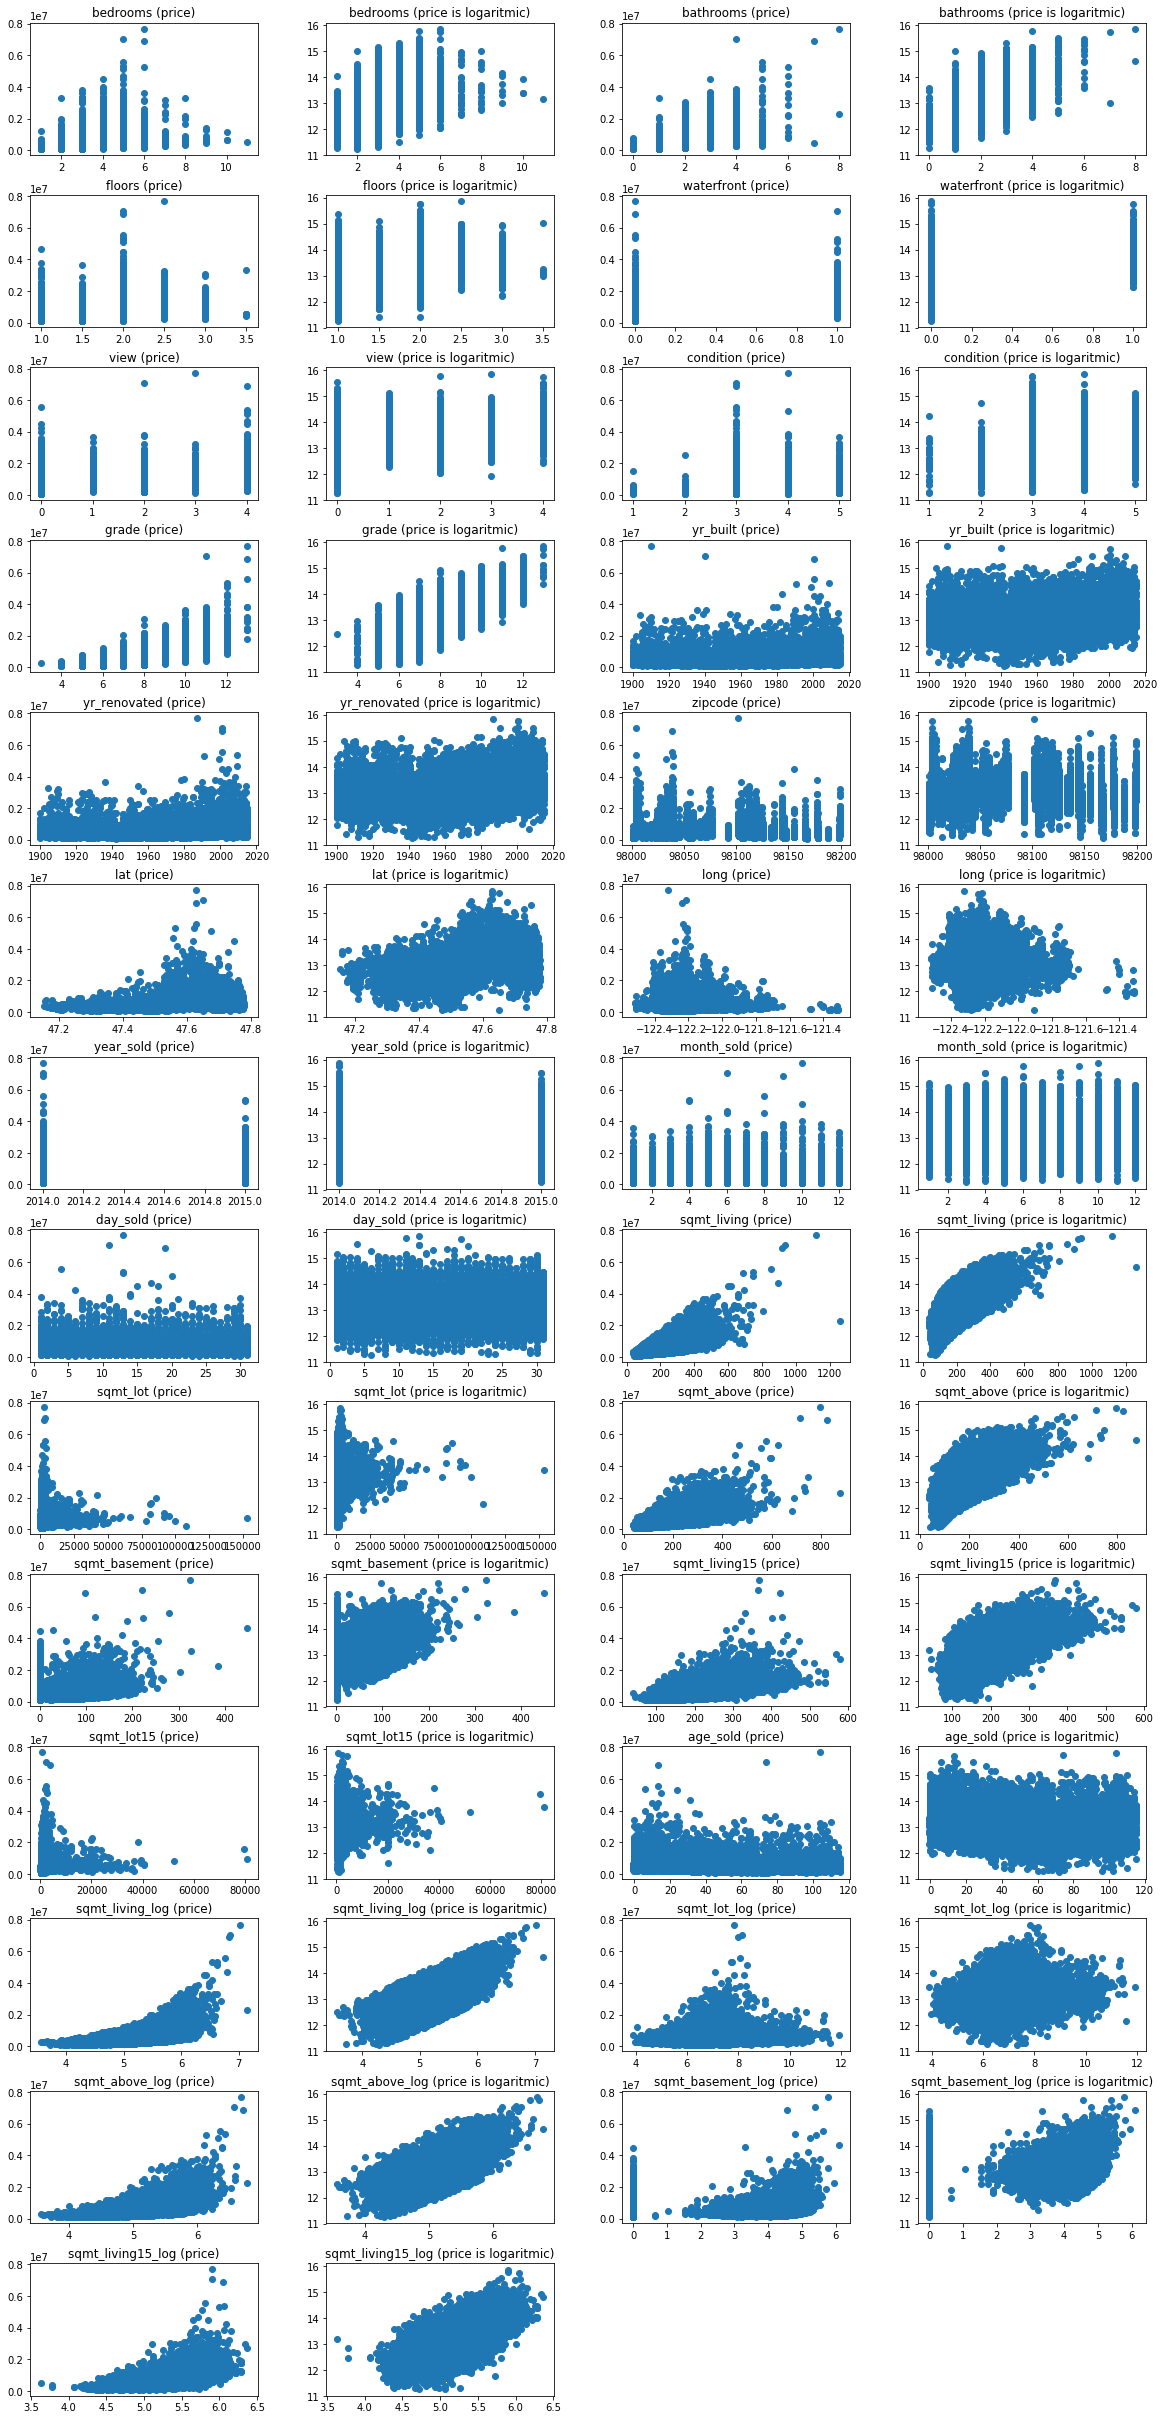

In [13]:
plt.figure(figsize=(20, 50))
plt.tight_layout()

for i in range(2, len(house.columns)-1):
    plt.subplot(16,4,2*i-3)
    plt.scatter(house[house.columns[i]], house["price"])
    plt.title(house.columns[i]+" (price)")
    
    plt.subplot(16,4,2*i-2)
    plt.scatter(house[house.columns[i]], np.log(house["price"]))
    plt.title(house.columns[i]+" (price is logaritmic)")

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

- As we see;

>- Up to 6 bedrooms, price increases; and then decreases,
- There is a slight relation between price and grade,
- Prices are getting higher as latitude increases and longtitude decreases,
- Squaremeters of living area is strongly related with price,
- Squaremeters of above ground level has relation with the target.

#### 3.4. MAPPING HOUSES

- Let's see locations of houses on a map and check whether it says us something.

- It seems houses around the lake and streams costs pretty higher. Latitude can be used to add that feature to the model, but unfortunately longtitude doesn't seem to be correlated with the target.

#### 3.5. CORRELATIONS

- Belove is the correlation matrix. We should check the correlations with our target.

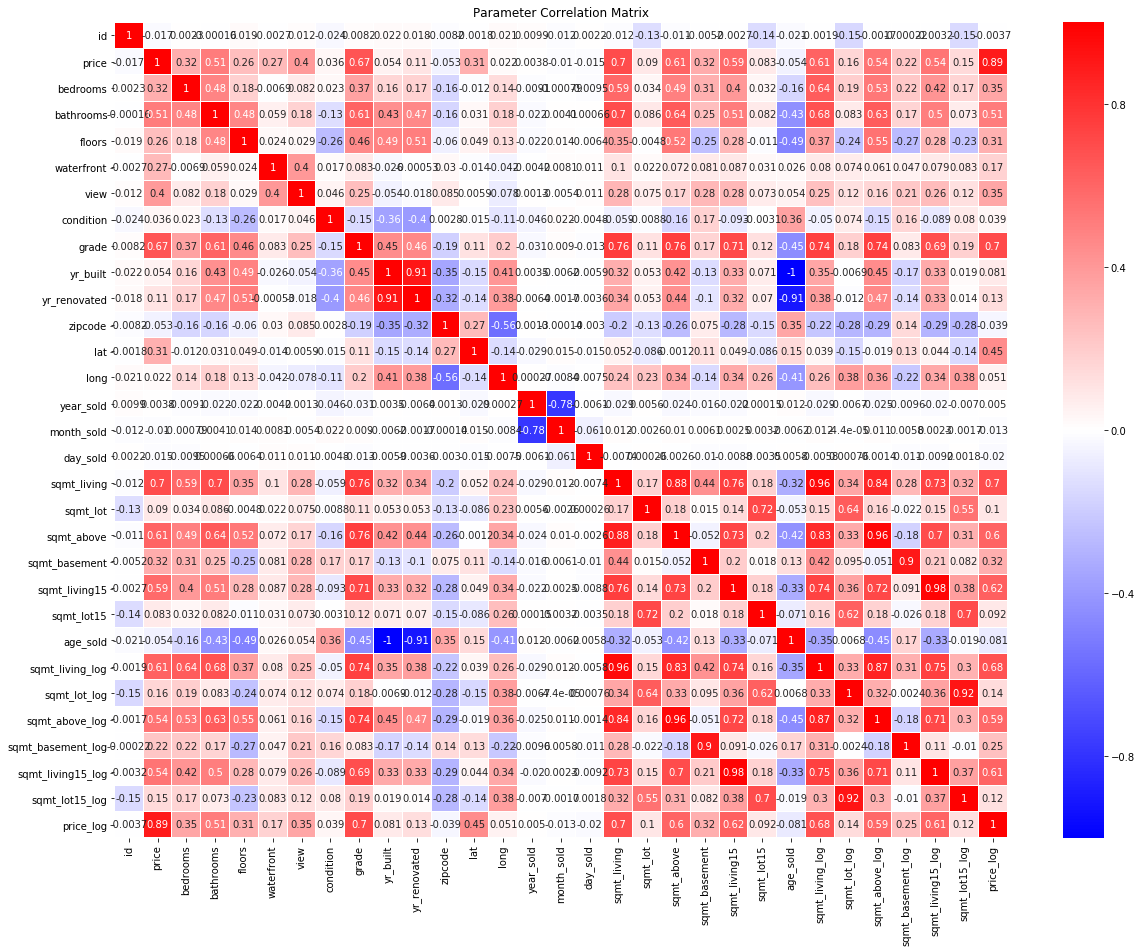

In [14]:
house["price_log"]=np.log(house["price"])
house_corr=house.corr()

plt.figure(figsize=(20,15))
sns.heatmap(house_corr, vmin=-1, vmax=1, cmap="bwr", annot=True, linewidth=0.1)
plt.title("Parameter Correlation Matrix")
plt.show()

- This figure is difficult to interpret. If we reduce size, we can easily see relations. Selecting values above 0.2 may be useful.

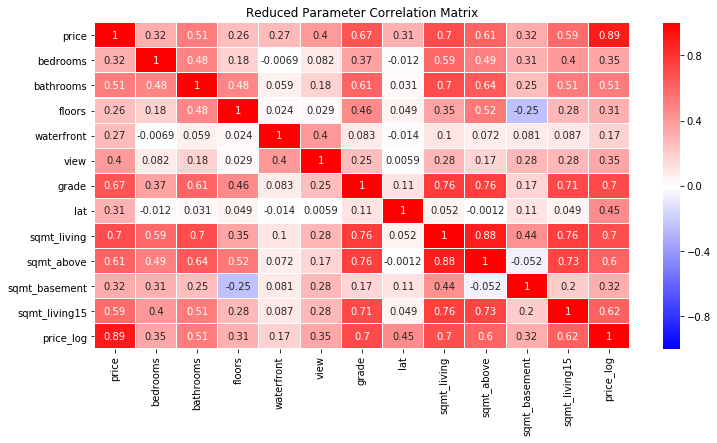

In [15]:
selected_columns=["price", "bedrooms", "bathrooms","floors", "waterfront", "view", "grade", "lat", 
                  "sqmt_living", "sqmt_above", "sqmt_basement", "sqmt_living15", "price_log"]

reduced=house_corr.loc[selected_columns, selected_columns]

plt.figure(figsize=(12,6))
sns.heatmap(reduced, vmin=-1, vmax=1, cmap="bwr", annot=True, linewidth=0.1)
plt.title("Reduced Parameter Correlation Matrix")
plt.show()

- We explored our data set until now. From now on, we are going to set and test several models. Primarily, we should split the data set into 2 pieces for training and testing. Parameters look like a little bit more related with logaritmic price. So, we can use that in our models.

### 4. MODELING

#### 4.1. MODELS

In [16]:
Y = house["price_log"]
X = house[["bedrooms", "bathrooms","floors", "waterfront", "view", "grade", "lat", 
                  "sqmt_living", "sqmt_above", "sqmt_basement", "sqmt_living15"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 16197
Test kümesindeki gözlem sayısı   : 5399


- Here are our models and definitions:

In [17]:
# Having less correlation with eachother (also with target) having unique features
model_1=house[["bedrooms", "floors", "waterfront", "view", "lat", "sqmt_basement"]]

# Having less correlation with eachother including 1 high target-correlated parameter
model_2=house[["bedrooms", "floors", "waterfront", "view", "lat", "sqmt_basement", "sqmt_living"]]

# Having less correlation with eachother including 1 (different) high target-correlated parameter
model_3=house[["bedrooms", "floors", "waterfront", "view", "lat", "sqmt_basement", "grade"]]

# Highest target-correlated parameters (May contain heteroskedasticity)
model_4=house[["bathrooms", "grade", "sqmt_living", "sqmt_above", "sqmt_living15"]]

# Balanced (half is less correlated having unique features, and other half is high target-correlated)
model_5=house[["waterfront", "view", "lat", "grade", "sqmt_living", "bathrooms"]]

# 7 components of PCA result
house_stdized = StandardScaler().fit_transform(house)
pca = PCA(n_components=7)
h_std=pca.fit_transform(house_stdized)

pca_result=pd.DataFrame()
for i in range(7):
    pca_result[i]=h_std.T[i]

model_6=pca_result

#### 4.2. TRAINING AND PREDICTING

- Now, let's train our models and check which is the best.

In [18]:
# MODEL 1
m_1_train, m_1_test, y_train, y_test = train_test_split(model_1, Y, test_size = 0.25, random_state = 465)
m_1_train = sm.add_constant(m_1_train)
result_1 = sm.OLS(y_train, m_1_train).fit()
print(result_1.summary())

# MODEL 2
m_2_train, m_2_test, y_train, y_test = train_test_split(model_2, Y, test_size = 0.25, random_state = 465)
m_2_train = sm.add_constant(m_2_train)
result_2 = sm.OLS(y_train, m_2_train).fit()
print(result_2.summary())

# MODEL 3
m_3_train, m_3_test, y_train, y_test = train_test_split(model_3, Y, test_size = 0.25, random_state = 465)
m_3_train = sm.add_constant(m_3_train)
result_3 = sm.OLS(y_train, m_3_train).fit()
print(result_3.summary())

# MODEL 4
m_4_train, m_4_test, y_train, y_test = train_test_split(model_4, Y, test_size = 0.25, random_state = 465)
m_4_train = sm.add_constant(m_4_train)
result_4 = sm.OLS(y_train, m_4_train).fit()
print(result_4.summary())

# MODEL 5
m_5_train, m_5_test, y_train, y_test = train_test_split(model_5, Y, test_size = 0.25, random_state = 465)
m_5_train = sm.add_constant(m_5_train)
result_5 = sm.OLS(y_train, m_5_train).fit()
print(result_5.summary())

# MODEL 6
m_6_train, m_6_test, y_train, y_test = train_test_split(model_6, Y, test_size = 0.25, random_state = 465)
m_6_train = sm.add_constant(m_6_train)
result_6 = sm.OLS(y_train, m_6_train).fit()
print(result_6.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     2845.
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        04:25:06   Log-Likelihood:                -6767.1
No. Observations:               16197   AIC:                         1.355e+04
Df Residuals:                   16190   BIC:                         1.360e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -62.6822      1.003    -62.525

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                 1.134e+04
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        04:25:07   Log-Likelihood:                 1783.0
No. Observations:               16197   AIC:                            -3550.
Df Residuals:                   16189   BIC:                            -3489.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0480      0.002   7659.359      0.0

- Model_6 using PCA gives the best results having the ratio of 83.1% according to adjusted R-square test. Also, it has the best results according to AIC and BIC tests.

#### 4.3. RESULTS

- What about test results? Which model predicts target parameter the best with unseen observations? Let's test them.

In [28]:
# Model 1 predicts
m_1_test=sm.add_constant(m_1_test)
result_1_predicted=result_1.predict(m_1_test)
train_1_predicted=result_1.predict(m_1_train)

# Model 2 predicts
m_2_test=sm.add_constant(m_2_test)
result_2_predicted=result_2.predict(m_2_test)
train_2_predicted=result_2.predict(m_2_train)

# Model 3 predicts
m_3_test=sm.add_constant(m_3_test)
result_3_predicted=result_3.predict(m_3_test)
train_3_predicted=result_3.predict(m_3_train)

# Model 4 predicts
m_4_test=sm.add_constant(m_4_test)
result_4_predicted=result_4.predict(m_4_test)
train_4_predicted=result_4.predict(m_4_train)

# Model 5 predicts
m_5_test=sm.add_constant(m_5_test)
result_5_predicted=result_5.predict(m_5_test)
train_5_predicted=result_5.predict(m_5_train)

# Model 6 predicts
m_6_test=sm.add_constant(m_6_test)
result_6_predicted=result_6.predict(m_6_test)
train_6_predicted=result_6.predict(m_6_train)

In [20]:
print("---------- MODEL 1 ----------")
print("Mean Absolute Error (MAE)             : {}".format(mean_absolute_error(y_test, result_1_predicted)))
print("Mean Squared Error (MSE)              : {}".format(mse(y_test, result_1_predicted)))
print("Root Mean Square Error (RMSE)         : {}".format(rmse(y_test, result_1_predicted)))
print("Mean Absolute Percentage Error (MAPE) : {}".format(np.mean(np.abs((y_test - result_1_predicted) / y_test)) * 100))
print("\n")

print("---------- MODEL 2 ----------")
print("Mean Absolute Error (MAE)             : {}".format(mean_absolute_error(y_test, result_2_predicted)))
print("Mean Squared Error (MSE)              : {}".format(mse(y_test, result_2_predicted)))
print("Root Mean Square Error (RMSE)         : {}".format(rmse(y_test, result_2_predicted)))
print("Mean Absolute Percentage Error (MAPE) : {}".format(np.mean(np.abs((y_test - result_2_predicted) / y_test)) * 100))
print("\n")

print("---------- MODEL 3 ----------")
print("Mean Absolute Error (MAE)             : {}".format(mean_absolute_error(y_test, result_3_predicted)))
print("Mean Squared Error (MSE)              : {}".format(mse(y_test, result_3_predicted)))
print("Root Mean Square Error (RMSE)         : {}".format(rmse(y_test, result_3_predicted)))
print("Mean Absolute Percentage Error (MAPE) : {}".format(np.mean(np.abs((y_test - result_3_predicted) / y_test)) * 100))
print("\n")

print("---------- MODEL 4 ----------")
print("Mean Absolute Error (MAE)             : {}".format(mean_absolute_error(y_test, result_4_predicted)))
print("Mean Squared Error (MSE)              : {}".format(mse(y_test, result_4_predicted)))
print("Root Mean Square Error (RMSE)         : {}".format(rmse(y_test, result_4_predicted)))
print("Mean Absolute Percentage Error (MAPE) : {}".format(np.mean(np.abs((y_test - result_4_predicted) / y_test)) * 100))
print("\n")

print("---------- MODEL 5 ----------")
print("Mean Absolute Error (MAE)             : {}".format(mean_absolute_error(y_test, result_5_predicted)))
print("Mean Squared Error (MSE)              : {}".format(mse(y_test, result_5_predicted)))
print("Root Mean Square Error (RMSE)         : {}".format(rmse(y_test, result_5_predicted)))
print("Mean Absolute Percentage Error (MAPE) : {}".format(np.mean(np.abs((y_test - result_5_predicted) / y_test)) * 100))
print("\n")

print("---------- MODEL 6 ----------")
print("Mean Absolute Error (MAE)             : {}".format(mean_absolute_error(y_test, result_6_predicted)))
print("Mean Squared Error (MSE)              : {}".format(mse(y_test, result_6_predicted)))
print("Root Mean Square Error (RMSE)         : {}".format(rmse(y_test, result_6_predicted)))
print("Mean Absolute Percentage Error (MAPE) : {}".format(np.mean(np.abs((y_test - result_6_predicted) / y_test)) * 100))
print("\n")

---------- MODEL 1 ----------
Mean Absolute Error (MAE)             : 0.28530610826250896
Mean Squared Error (MSE)              : 0.13677618849356646
Root Mean Square Error (RMSE)         : 0.36983264930717846
Mean Absolute Percentage Error (MAPE) : 2.1770457326372425


---------- MODEL 2 ----------
Mean Absolute Error (MAE)             : 0.2248637493843855
Mean Squared Error (MSE)              : 0.08513677602149762
Root Mean Square Error (RMSE)         : 0.2917820693968319
Mean Absolute Percentage Error (MAPE) : 1.7186039163941833


---------- MODEL 3 ----------
Mean Absolute Error (MAE)             : 0.22391403716999383
Mean Squared Error (MSE)              : 0.08400380682616577
Root Mean Square Error (RMSE)         : 0.2898341022484514
Mean Absolute Percentage Error (MAPE) : 1.7134730533702638


---------- MODEL 4 ----------
Mean Absolute Error (MAE)             : 0.27567269247431964
Mean Squared Error (MSE)              : 0.11702266240826348
Root Mean Square Error (RMSE)         : 

- All tests tell us that the best model is the sixth one having the lowest values.

#### 4.4. VISUALIZATION OF RESULTS

- Visualization of predictions.

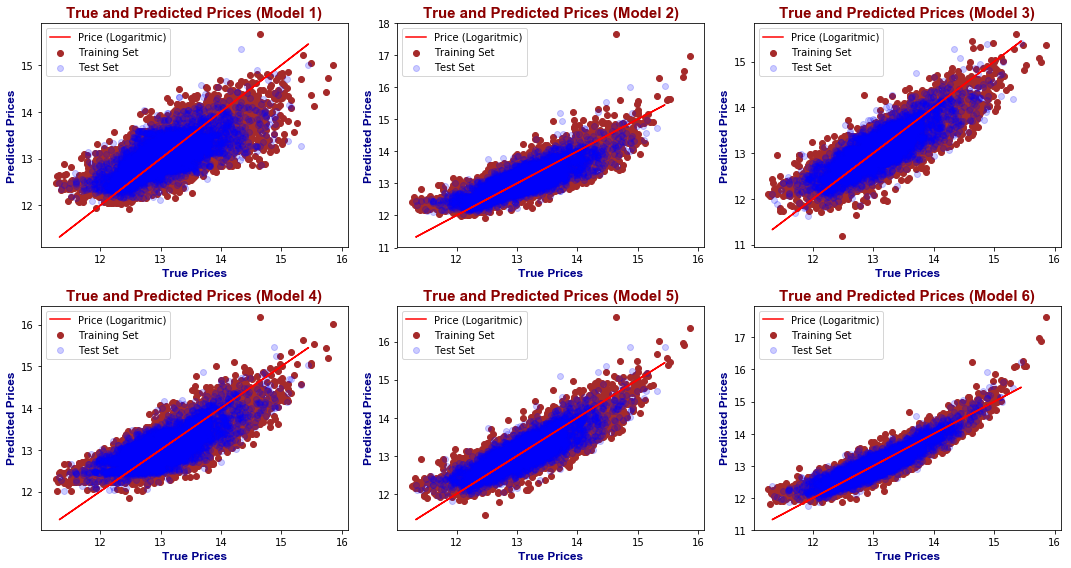

In [59]:
header_font = {'family':'arial', 'color':'darkred', 'weight':'bold', 'size':15}
axis_font = {'family':'arial', 'color':'darkblue', 'weight':'bold', 'size':12}

plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
plt.scatter(y_train, train_1_predicted, color="brown", label="Training Set")
plt.scatter(y_test, result_1_predicted, color="blue", label="Test Set", alpha=0.2)
plt.plot(y_test, y_test, color="red", label="Price (Logaritmic)")
plt.xlabel("True Prices", fontdict=axis_font)
plt.ylabel("Predicted Prices", fontdict=axis_font)
plt.title("True and Predicted Prices (Model 1)", fontdict=header_font)
plt.legend(loc = "upper left")

plt.subplot(2,3,2)
plt.scatter(y_train, train_2_predicted, color="brown", label="Training Set")
plt.scatter(y_test, result_2_predicted, color="blue", label="Test Set", alpha=0.2)
plt.plot(y_test, y_test, color="red", label="Price (Logaritmic)")
plt.xlabel("True Prices", fontdict=axis_font)
plt.ylabel("Predicted Prices", fontdict=axis_font)
plt.title("True and Predicted Prices (Model 2)", fontdict=header_font)
plt.legend(loc = "upper left")

plt.subplot(2,3,3)
plt.scatter(y_train, train_3_predicted, color="brown", label="Training Set")
plt.scatter(y_test, result_3_predicted, color="blue", label="Test Set", alpha=0.2)
plt.plot(y_test, y_test, color="red", label="Price (Logaritmic)")
plt.xlabel("True Prices", fontdict=axis_font)
plt.ylabel("Predicted Prices", fontdict=axis_font)
plt.title("True and Predicted Prices (Model 3)", fontdict=header_font)
plt.legend(loc = "upper left")

plt.subplot(2,3,4)
plt.scatter(y_train, train_4_predicted, color="brown", label="Training Set")
plt.scatter(y_test, result_4_predicted, color="blue", label="Test Set", alpha=0.2)
plt.plot(y_test, y_test, color="red", label="Price (Logaritmic)")
plt.xlabel("True Prices", fontdict=axis_font)
plt.ylabel("Predicted Prices", fontdict=axis_font)
plt.title("True and Predicted Prices (Model 4)", fontdict=header_font)
plt.legend(loc = "upper left")

plt.subplot(2,3,5)
plt.scatter(y_train, train_5_predicted, color="brown", label="Training Set")
plt.scatter(y_test, result_5_predicted, color="blue", label="Test Set", alpha=0.2)
plt.plot(y_test, y_test, color="red", label="Price (Logaritmic)")
plt.xlabel("True Prices", fontdict=axis_font)
plt.ylabel("Predicted Prices", fontdict=axis_font)
plt.title("True and Predicted Prices (Model 5)", fontdict=header_font)
plt.legend(loc = "upper left")

plt.subplot(2,3,6)
plt.scatter(y_train, train_6_predicted, color="brown", label="Training Set")
plt.scatter(y_test, result_6_predicted, color="blue", label="Test Set", alpha=0.2)
plt.plot(y_test, y_test, color="red", label="Price (Logaritmic)")
plt.xlabel("True Prices", fontdict=axis_font)
plt.ylabel("Predicted Prices", fontdict=axis_font)
plt.title("True and Predicted Prices (Model 6)", fontdict=header_font)
plt.legend(loc = "upper left")

plt.tight_layout()
plt.show()

- As seen on graphics, all models  are approximately parallel with logaritmic prices. But, model 6 has the best result. In addition; because of our target parameter is logaritmic, we should not forget to apply anti-logaritmic transformation to the predicted results.

### 5. MODEL VERIFICATION

We are going to verify our model according to Gauss-Markov Assumptions (Conditions). Below is the assumptions to use:
>1. Linearity: The parameters we are estimating using the OLS method must be themselves linear.
2. Random: Our data must have been randomly sampled from the population. Errors must be distrubuted normally.
3. Non-Collinearity: The regressors being calculated aren’t perfectly correlated with each other.
4. Exogeneity: The regressors aren’t correlated with the error term.
5. Homoscedasticity: No matter what the values of our regressors might be, the error of the variance is constant.

Now, let's verify.

#### 5.1. LINEARITY

- In principle, this assumption is not about estimation, but about how we determine our model. Therefore, as long as we use models that take linearity assumption into account, there is no need to worry about this. Our co-efficients can be seen above.

#### 5.2. RANDOM

- Our data set is taken from real life in a time period and from a certain place that we are estimating the prices.
- train_test_split method that we made use of chooses the test sample randomly for us.
- P value of Jarque-Bera test for model 6 (as can be seen above) is 1.16e-260 (converges to zero). This means, errors are distributed randomly.

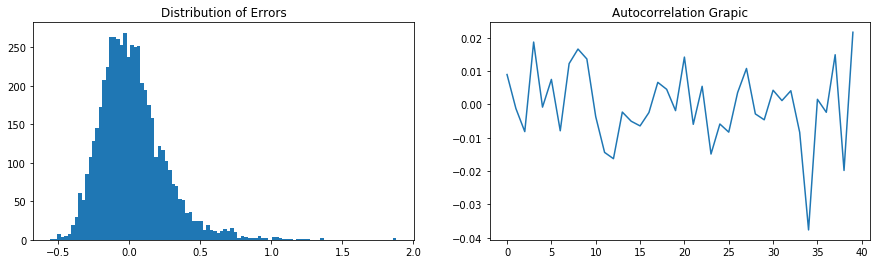

In [22]:
errors=math.e**result_6_predicted-math.e**y_test
acf_data = acf(errors)

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(errors/math.e**y_test, bins=100)
plt.title("Distribution of Errors")

plt.subplot(1,2,2)
plt.plot(acf_data[1:])
plt.title("Autocorrelation Grapic")

plt.show()

- Error distribution generally fits to normal distribution with slight skewness. As we look at the auto correlation graphic, all correlations are in 0.05 confidence interval. 

#### 5.3. NON-COLLINEARITY

To determine multicollinearity, we can look at the correlation matrix of properties. multicollinearity can be eliminated by PCA or by disposing of some associated properties. Therefore our model 6 is result of PCA, this condition is OK.

#### 5.4. EXOGENEITY

If we check Durbin-Watson Test result from the model summary, it is seen as 2.009. This result tells us that error terms are not correlated with any regressors. If it were +1 or -1, there would be strong correlation and the model wouldn't be able to be used.

#### 5.5. HOMOSCEDASTICITY

- We are going to use Bartlett and Levene tests for this.

In [23]:
bart_stats = bartlett(math.e**result_6_predicted, errors)
lev_stats = levene(math.e**result_6_predicted, errors)

print("Bartlett test value : {0:3g} and p value : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test value   : {0:3g} and p value : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test value : 3235.65 and p value : 0.000000000000000000000
Levene test value   : 417.338 and p value : 0.000000000000000000000


- As p values are equal to zero, our model is homocedasticitic.

### 6. CONCLUSION

1. Price taken logaritm gave better results than raw price parameter.

2. Our best model's adj.R^2 value is 83.1%,

3. According to all 5 Gauss-Markov Assumptions, our model is successful.